In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

GETTING THE DATA

In [132]:
from olistdash.data import Olist
data = Olist().get_data()

TOTAL PAYMENTS TO OLIST

In [133]:
data['order_payments']['payment_value'].sum()

16008872.12

In [134]:
df = data['order_payments'][['order_id','payment_value']].merge(data['orders'][['order_id','order_purchase_timestamp']], on='order_id', how='outer')

In [135]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df = df.set_index('order_purchase_timestamp')
df.sort_index()

,order_id,payment_value
order_purchase_timestamp,,
2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,136.23
2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,75.06
2016-09-13 15:24:19,809a282bbd5dbcabb6f2f724fca862ec,40.95
2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,NaN
2016-10-02 22:07:52,71303d7e93b399f5bcd537d124c0bcfa,109.34
...,...,...
2018-09-29 09:13:03,392ed9afd714e3c74767d0c4d3e3f477,137.03
2018-10-01 15:30:09,616fa7d4871b87832197b2a137a115d2,80.38
2018-10-03 18:55:29,a2ac6dad85cf8af5b0afb510a240fe8c,197.55


order_purchase_timestamp
2016-12-31      59362.34
2017-12-31    7249746.73
2018-12-31    8699763.05
Freq: A-DEC, Name: payment_value, dtype: float64


Text(0.5, 1.0, 'Yearly payment value')

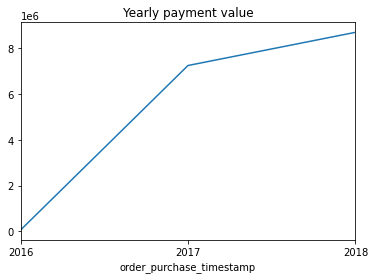

In [146]:
print(df.resample('Y')['payment_value'].sum())
df.resample('Y')['payment_value'].sum().plot()
plt.title('Yearly payment value')

In [141]:
df.resample('M')['payment_value'].sum()

order_purchase_timestamp
2016-09-30        252.24
2016-10-31      59090.48
2016-11-30          0.00
2016-12-31         19.62
2017-01-31     138488.04
2017-02-28     291908.01
2017-03-31     449863.60
2017-04-30     417788.03
2017-05-31     592918.82
2017-06-30     511276.38
2017-07-31     592382.92
2017-08-31     674396.32
2017-09-30     727762.45
2017-10-31     779677.88
2017-11-30    1194882.80
2017-12-31     878401.48
2018-01-31    1115004.18
2018-02-28     992463.34
2018-03-31    1159652.12
2018-04-30    1160785.48
2018-05-31    1153982.15
2018-06-30    1023880.50
2018-07-31    1066540.75
2018-08-31    1022425.32
2018-09-30       4439.54
2018-10-31        589.67
Freq: M, Name: payment_value, dtype: float64

In [92]:
df['month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month

In [93]:
df.groupby('year')['payment_value'].sum()

year
2016      59362.34
2017    7249746.73
2018    8699763.05
Name: payment_value, dtype: float64

In [94]:
df.head()

,order_id,payment_value,order_purchase_timestamp,date,year,month
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,2018-04-25 22:01:49,2018-04-25,2018,4
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,2018-06-26 11:01:38,2018-06-26,2018,6
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,2017-12-12 11:19:55,2017-12-12,2017,12
3,ba78997921bbcdc1373bb41e913ab953,107.78,2017-12-06 12:04:06,2017-12-06,2017,12
4,42fdf880ba16b47b59251dd489d4441a,128.45,2018-05-21 13:59:17,2018-05-21,2018,5


In [95]:
df = df.sort_values(by=['date'])

In [49]:
y = df.groupby('date')['payment_value'].sum().reset_index(drop=True)
y

0      136.23
1       75.06
2       40.95
3        0.00
4      109.34
        ...  
629    137.03
630     80.38
631    197.55
632    222.03
633     89.71
Name: payment_value, Length: 634, dtype: float64

In [50]:
x = df['date'].drop_duplicates()
x

29482     2016-09-04
63668     2016-09-05
61038     2016-09-13
103886    2016-09-15
35342     2016-10-02
             ...    
95876     2018-09-29
38098     2018-10-01
66093     2018-10-03
5958      2018-10-16
11904     2018-10-17
Name: date, Length: 634, dtype: object

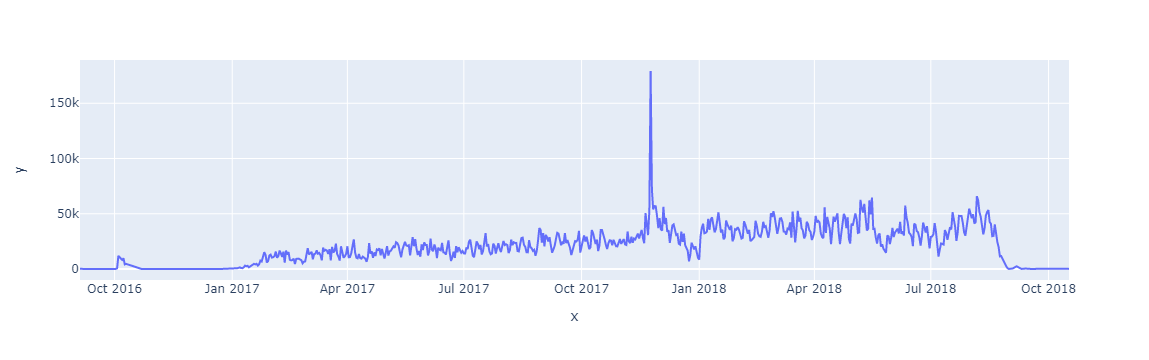

In [73]:
import plotly.express as px

df_1 = pd.concat([x, y], axis=1)

# df = px.data.stocks()
# fig = px.line(df, x='date', y="GOOG")
# fig.show()

fig = px.line(df_1,x,y)
# fig.update_traces(xperiod="M1")
fig.show()

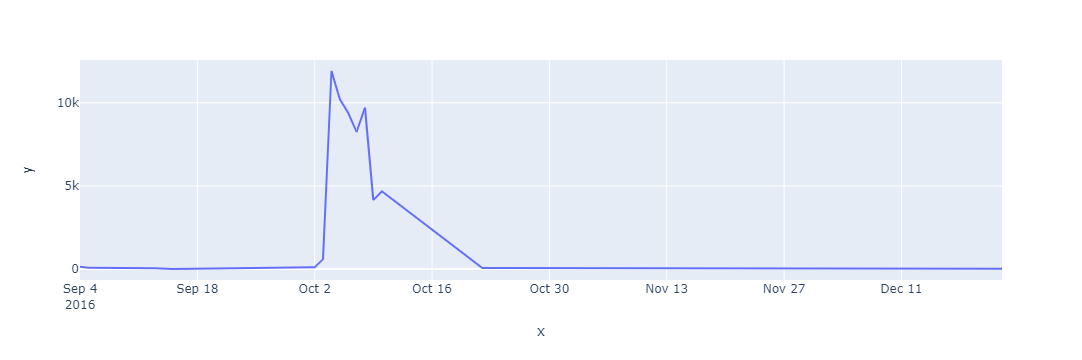

In [102]:
def year_2016():
    df_2016 = df[df['year'] == 2016]
    y = df_2016.groupby('date')['payment_value'].sum().reset_index(drop=True)
    x = df_2016['date'].drop_duplicates()
    df_plot = pd.concat([x, y], axis=1)
    fig = px.line(df_plot,x,y)
    return fig.show()

year_2016()

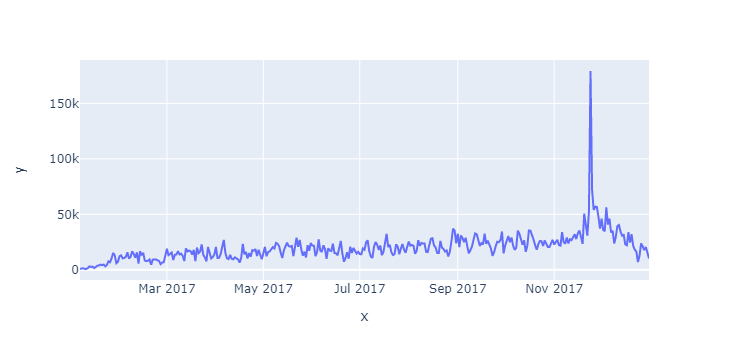

In [111]:
def year_2017():
    df_2017 = df[df['year'] == 2017]
    y = df_2017.groupby('date')['payment_value'].sum().reset_index(drop=True)
    x = df_2017['date'].drop_duplicates()
    df_plot = pd.concat([x, y], axis=1)
    fig = px.line(df_plot,x,y)
#     fig.update_traces(xperiod="M0.5")
    return fig.show()

year_2017()

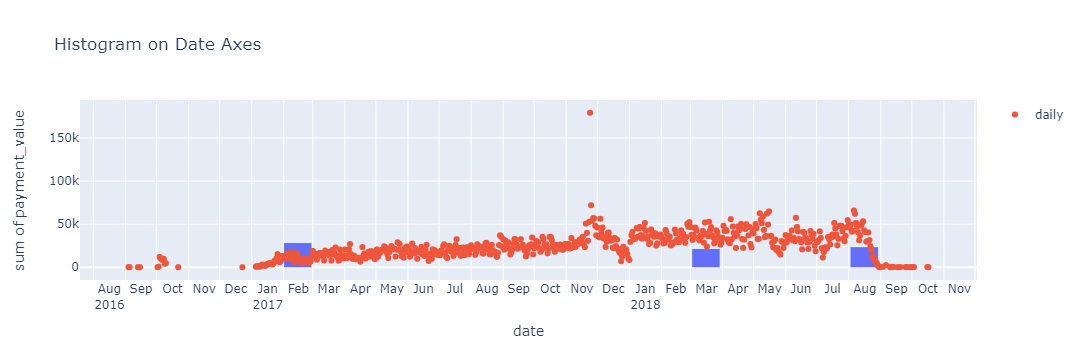

In [98]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


fig = px.histogram(df_1, x="date", y="payment_value", histfunc="sum", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=x, y=y, name="daily"))
fig.show()